In [1]:
%matplotlib inline

In [2]:
import numpy as np
import math
from scipy.integrate import odeint
import scipy.constants as constants
#import pint
import matplotlib.pyplot as plt
import pandas as pd

Solve the equations for $1/r^2$ force.
$$r = \sqrt{x^2 + y^2}$$
$$v = \sqrt{v_x^2 + v_y^2}$$
$$\gamma = \frac{1}{\sqrt{1 - \frac{v^2}{c^2}}}$$
$$\dot{v_x} = - \frac{1}{\gamma} \frac{x}{r} \frac{G M}{r^2}$$
$$\dot{v_y} = - \frac{1}{\gamma} \frac{y}{r} \frac{G M}{r^2}$$
$$\dot{x} = v_x$$
$$\dot{y} = v_y$$

Define some constants.

In [126]:
G = constants.G
c = constants.c
M = 1.989e30*1e4
tau_sun = ((27+35)/2)*86400e-8
omega = 2*constants.pi/tau_sun
r_sun = 695700e3
m_mercury = 3.285E23
tau = 87.969*86400/math.sqrt(1e4)
r_apo = 69.82E9
v_apo = 38.86E3*math.sqrt(1e3)
N = 100000

In the function `calc_derivative`, the `yvec` variable is laid out as $(x,y,v_x,v_y)$.

In [127]:
def calc_derivative(yvec, time):
    (x,y,vx,vy) = yvec
    r = math.sqrt(x**2 + y**2)
    a = -math.sqrt(1 - (vx**2 + vy**2)/c**2)*(G*M)/r**2
    return (vx, vy, (x/r)*a, (y/r)*a)

In [128]:
time_vec = np.linspace(0, tau*10, N)

In [129]:
y = odeint(calc_derivative, y0=(r_apo,0,0,-v_apo), t=time_vec)

Plot the resulting orbit.

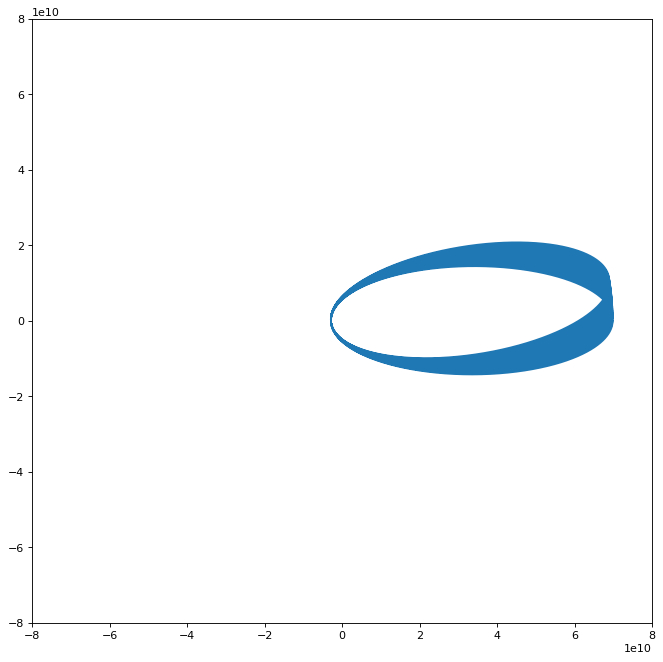

In [130]:
plt.figure(figsize=(10,10), dpi=80)
plt.xlim(-8e10,8e10)
plt.ylim(-8e10,8e10)
plt.plot(y[:,0], y[:,1])

In [95]:
df = pd.DataFrame(data=y, columns=['x','y','v_x','v_y'])
df

,x,y,v_x,v_y
0,6.982000e+10,0.000000e+00,0.000000e+00,-3.886000e+06
1,6.974136e+10,-2.952483e+09,-2.069261e+05,-3.881622e+06
2,6.950549e+10,-5.898309e+09,-4.136731e+05,-3.868479e+06
3,6.911261e+10,-8.830807e+09,-6.200597e+05,-3.846547e+06
4,6.856307e+10,-1.174328e+10,-8.259003e+05,-3.815782e+06
5,6.785733e+10,-1.462900e+10,-1.031003e+06,-3.776128e+06
6,6.699606e+10,-1.748118e+10,-1.235167e+06,-3.727508e+06
7,6.598003e+10,-2.029296e+10,-1.438179e+06,-3.669832e+06
8,6.481020e+10,-2.305744e+10,-1.639815e+06,-3.602991e+06
9,6.348772e+10,-2.576759e+10,-1.839832e+06,-3.526863e+06


The orthogravic field will add an additional acceleration given by:
$$a' = \frac{1}{\gamma} \frac{M_\odot \omega_\odot R_\odot^2 G}{2 c^2 r^3} v$$

In [96]:
def calc_ortho_deriv(yvec,t):
    (x,y,vx,vy) = yvec
    (xdot,ydot,vxdot,vydot) = calc_derivative(yvec,t)
    r = math.sqrt(x**2 + y**2)
    v = math.sqrt(vx**2 + vy**2)
    ortho = M*omega*r_sun**2*G/(2*c**2*r**3)
    ortho_z = -ortho
    a_ortho = -math.sqrt(1 - v**2/c**2)*v*ortho_z
    return (xdot,ydot,vxdot + (x/r)*a_ortho,vydot+(y/r)*a_ortho)

In [131]:
y_ortho = odeint(calc_ortho_deriv, y0=(r_apo,0,0,-v_apo), t=time_vec)

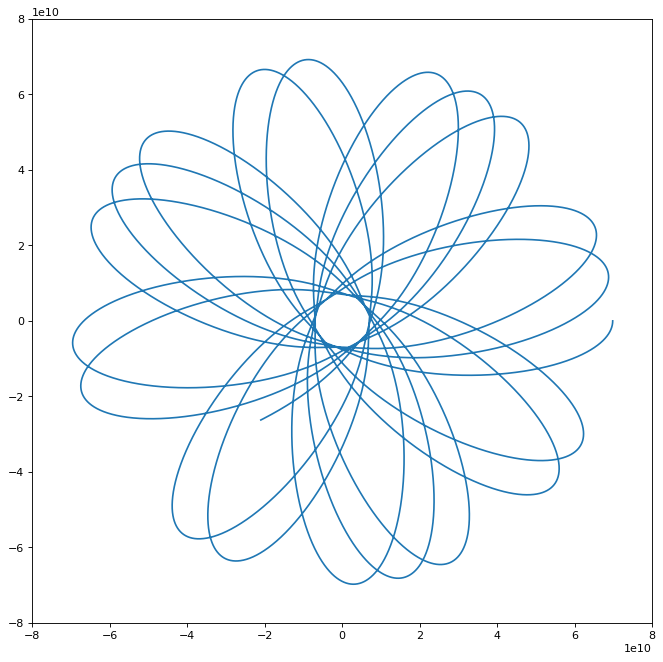

In [132]:
plt.figure(figsize=(10,10), dpi=80)
plt.xlim(-8e10,8e10)
plt.ylim(-8e10,8e10)
plt.plot(y_ortho[:,0], y_ortho[:,1])

In [12]:
df_ortho = pd.DataFrame(data=y_ortho, columns=['x','y','v_x','v_y'])
df_ortho

,x,y,v_x,v_y
0,6.982000e+10,0.000000e+00,0.000000,-38860.000000
1,6.981999e+10,-2.953592e+07,-20.697326,-38859.995360
2,6.981997e+10,-5.907184e+07,-41.394650,-38859.982227
3,6.981993e+10,-8.860774e+07,-62.091971,-38859.960338
4,6.981987e+10,-1.181436e+08,-82.789286,-38859.929693
5,6.981980e+10,-1.476795e+08,-103.486594,-38859.890293
6,6.981972e+10,-1.772153e+08,-124.183893,-38859.842137
7,6.981961e+10,-2.067511e+08,-144.881182,-38859.785226
8,6.981950e+10,-2.362868e+08,-165.578457,-38859.719559
9,6.981936e+10,-2.658225e+08,-186.275719,-38859.645136
